# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Step 1 CRISP - DM: Business understanding

<span style="color:red">This project aims to better understand and predict income based on known variables. In total, we have 14 variables, including the target. This study is crucial in this case to better manage accounts, loan limits, or what type of costumer we want to retain/seek or put more effort into.  </span>


## Step 2 Crisp-DM: Data understanding
<span style="color:red">In this data, we have some useful information and some not so useful for this specific project. In the table below there is a quick explanation of what each variable is and our target.  </span>


### Data dictionary

<span style="color:red">In this Dictionary we have the customer information based on a Form and his registration as well as the data type. </span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Date                                      | Object|
| id_cliente              |  Costumer id                                      | int|
| sexo                    |  Sex(masc. or Fem.)                                      | Object|
| posse_de_veiculo        |  Car                                       | Bool|
| posse_de_imovel         |  Own a house                                       | Bool|
| qtd_filhos              |  Amounts of childs                                      | int|
| tipo_renda              |  Work contract                                      | Object|
| educacao                |  Education level                                      | Object|
| estado_civil            |  Marital status                                      | Object|
| tipo_residencia         |  Residential type                                      | Object|
| idade                   |  Age                                      | int|
| tempo_emprego           |  Time in the job                                      | float|
| qt_pessoas_residencia   |  People amount in residence                                      | float|
| renda                   |  Salary/ income ( this is our target)                                     | float|





#### Packages needed

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from ydata_profiling import ProfileReport

%matplotlib inline

#### Loading data
The command pd.read_csv is from the pandas Package (pd.) and loads the designated csv file to a *dataframe* object from pandas.

In [2]:
df = pd.read_csv('./input/previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Understanding the data - Univariate
In this step, I will take a closer look at how the Data is distributed.

In [4]:
prof = ProfileReport(df, explorative=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

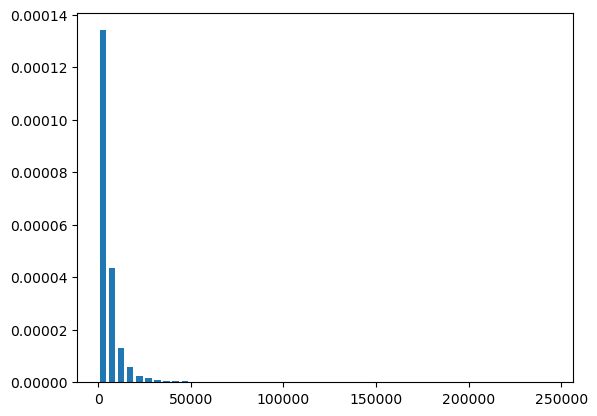

In [5]:
#let us see the distribution of income.
income = df['renda']
plt.hist(income, density=True, bins=50,rwidth=0.7) 
plt.show()

### Let's save this view in HTML

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">We have this Unnamed variable, for our propouse this is useless.
Date and customer id seem irrelevant as well. 
We can see that we have some missing values in the time in the job column, we will need to address this as well..</span>


### Understanding the data - bivariate




<span style="color:red">In this step, we will take a quick look on some variable and its correlation with 'renda' Salary/income. </span>


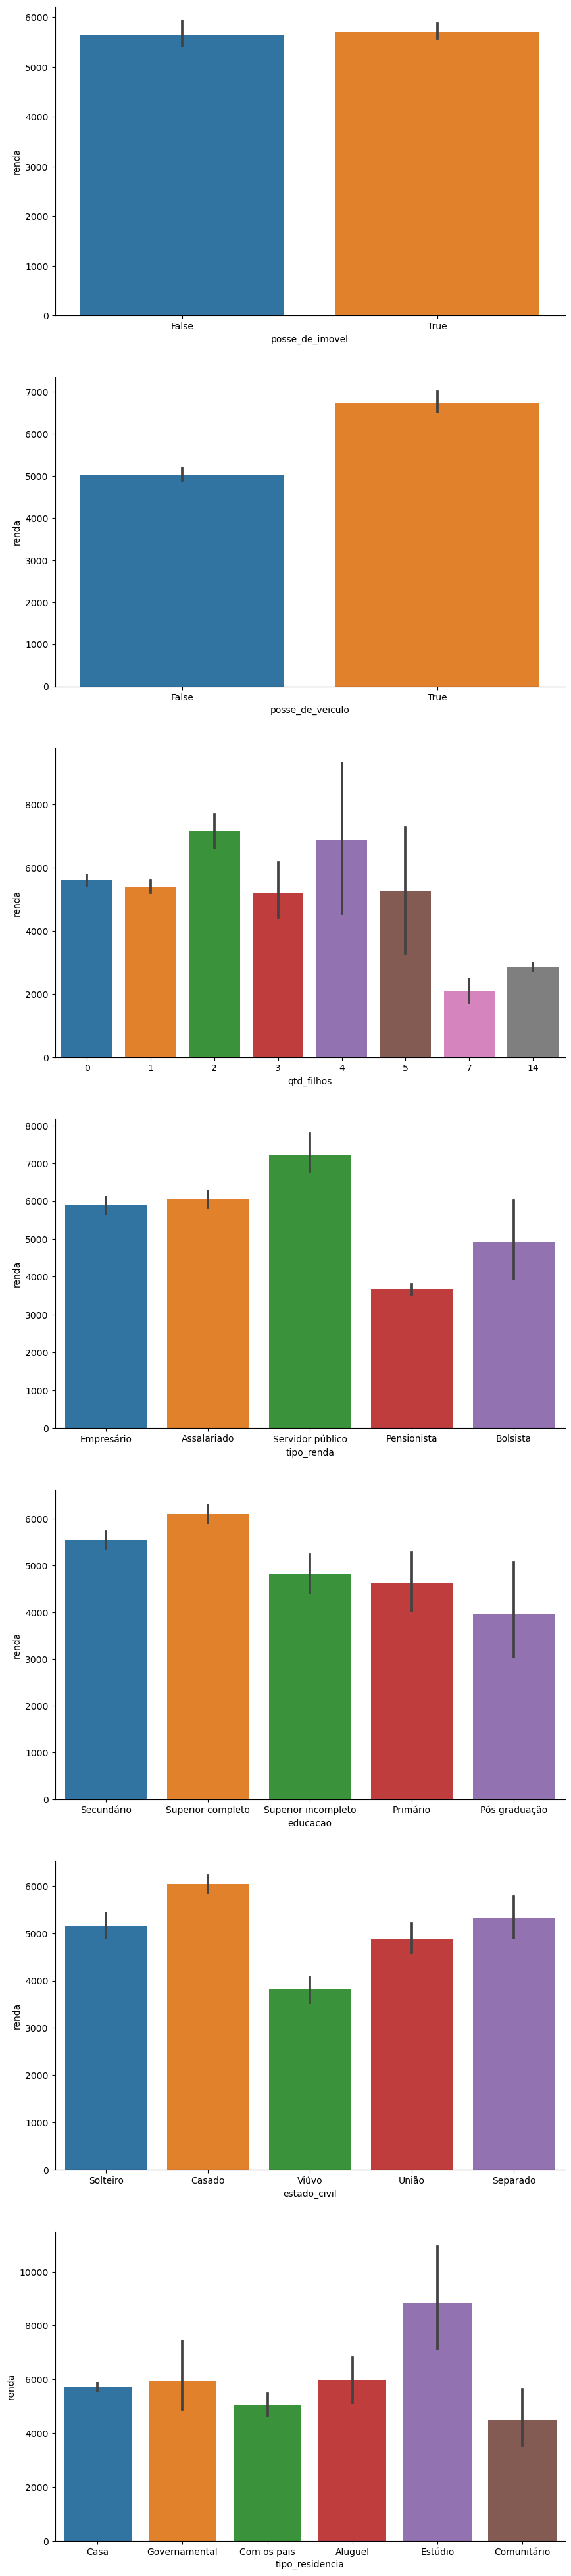

In [7]:
fig, ax = plt.subplots(7,1,figsize=(10,50))
sns.barplot(x='posse_de_imovel',y='renda',data=df, ax=ax[0])
sns.barplot(x='posse_de_veiculo',y='renda',data=df, ax=ax[1])
sns.barplot(x='qtd_filhos',y='renda',data=df, ax=ax[2])
sns.barplot(x='tipo_renda',y='renda',data=df, ax=ax[3])
sns.barplot(x='educacao',y='renda',data=df, ax=ax[4])
sns.barplot(x='estado_civil',y='renda',data=df, ax=ax[5])
sns.barplot(x='tipo_residencia',y='renda',data=df, ax=ax[6])
sns.despine()

## Step 3 Crisp-DM: Data preparation
In this step usually, we do these types of operations: 

 - **selection**: Do we have all the data selected?
 - **cleaning**: We need to identify and treat missing values
 - **construction**: build new variables
 - **integration**: in the case of, multiple data sources we need to integrate them
 - **formating**: format the data to the correct format.



In [8]:
# It seems that there are null values in "tempo_emprego" (time in the job) that don't make much sense,
# since it is possible to have decimal numbers in the field, let's exclude the 0s, this is "only" 17% on the data base.
df = df.dropna()
# let's remove some other unimportant data.  
df = df.drop(['Unnamed: 0','data_ref','id_cliente'], axis=1)

In [9]:
df = pd.get_dummies(df, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     12427 non-null  int64  
 1   idade                          12427 non-null  int64  
 2   tempo_emprego                  12427 non-null  float64
 3   qt_pessoas_residencia          12427 non-null  float64
 4   renda                          12427 non-null  float64
 5   sexo_M                         12427 non-null  uint8  
 6   posse_de_veiculo_True          12427 non-null  uint8  
 7   posse_de_imovel_True           12427 non-null  uint8  
 8   tipo_renda_Bolsista            12427 non-null  uint8  
 9   tipo_renda_Empresário          12427 non-null  uint8  
 10  tipo_renda_Pensionista         12427 non-null  uint8  
 11  tipo_renda_Servidor público    12427 non-null  uint8  
 12  educacao_Pós graduação         12427 non-null 

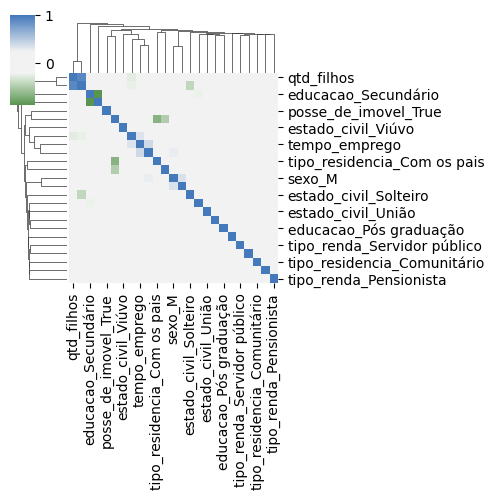

In [11]:
cmap = sns.diverging_palette(h_neg=125
                             , h_pos=250
                             , as_cmap=True
                             , sep = 60
                             , center = 'light')

sns.clustermap(df.corr(), figsize=(5, 5), center = 0, cmap=cmap)

In [12]:
# Calculete the linear correlation(pearson) of all variables with 'renda'(income)
correlacoes = df.corr()['renda'].sort_values(ascending=False)

# See correlation
print(correlacoes)

renda                            1.000000
tempo_emprego                    0.385013
sexo_M                           0.265325
idade                            0.127069
posse_de_veiculo_True            0.083105
tipo_renda_Servidor público      0.042051
tipo_residencia_Estúdio          0.028391
educacao_Superior completo       0.018961
qt_pessoas_residencia            0.018683
posse_de_imovel_True             0.015367
tipo_residencia_Casa             0.014470
tipo_residencia_Governamental    0.005098
qtd_filhos                       0.002192
educacao_Secundário             -0.003260
tipo_renda_Bolsista             -0.003609
tipo_renda_Pensionista          -0.009129
educacao_Pós graduação          -0.011118
estado_civil_Separado           -0.011293
tipo_residencia_Comunitário     -0.013116
tipo_renda_Empresário           -0.016260
estado_civil_Viúvo              -0.022990
estado_civil_Solteiro           -0.028065
tipo_residencia_Com os pais     -0.028878
educacao_Superior incompleto    -0

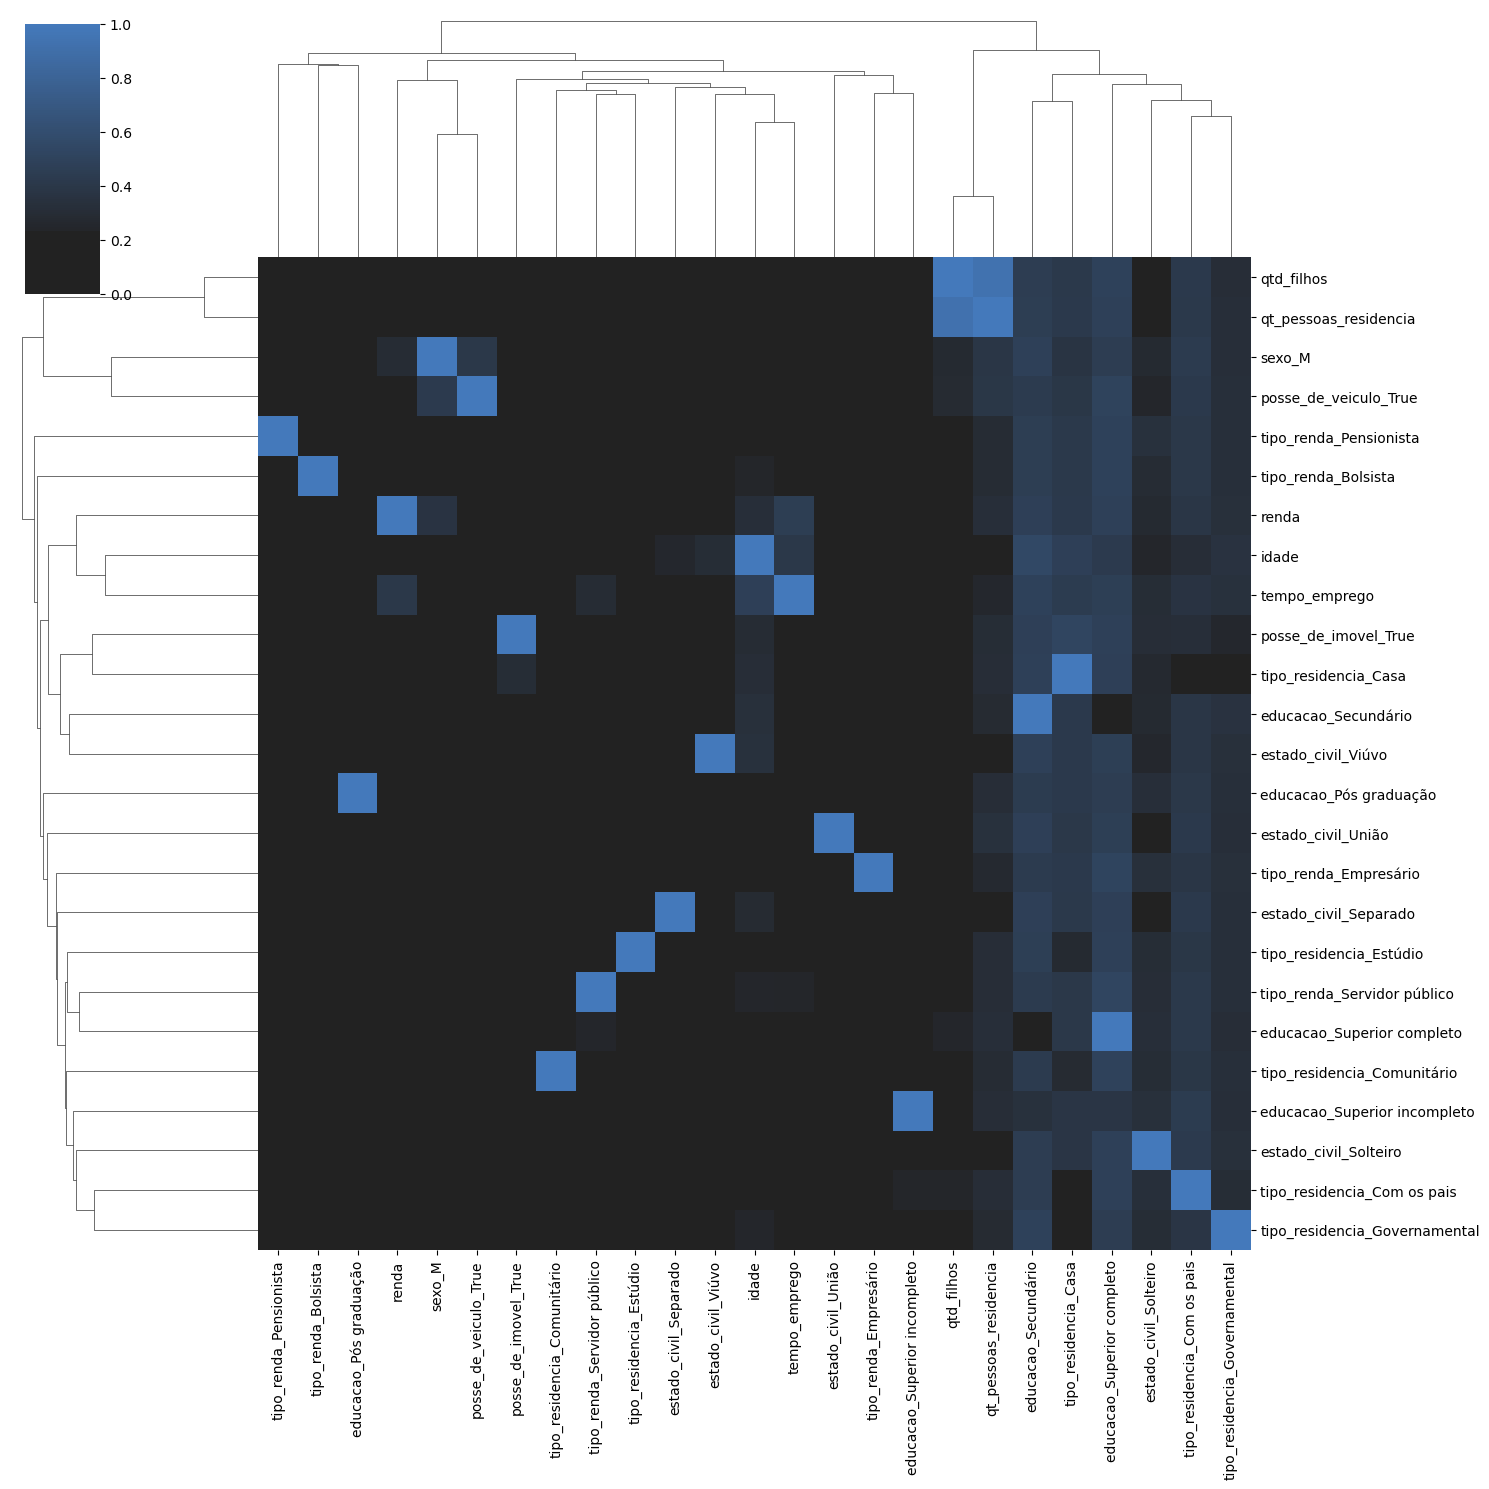

In [13]:
cmap = sns.diverging_palette(h_neg=125
                             , h_pos=250
                             , as_cmap=True
                             , sep = 60
                             , center = 'dark')

sns.clustermap(df.corr(), figsize=(15, 15), center = 0, cmap=cmap, standard_scale=1)

<span style="color:red">Now we have the DF (Data Frame) clean, without NaN, with dummies, and with the variable with some correlation. with that, we can build the model. </span>


## Step 4 Crisp-DM: Modeling
At this stage, we will build the model. Usually, the steps are:
- Select the modeling technique
- Test design
- Model evaluation


<span style="color:red">When doing this kind of analysis we can use some regression techniques to forecast an individual’s income based on a set of variables. The most common are polynomial regression and decision tree regression. For this specific project, I have opted for decision tree regression.

Decision tree regression constructs a model based on decision rules inferred from the data variables. It is particularly advantageous for handling non-linear relationships that are more complex and not straightforward, which is often the case with income prediction. This approach provides a clear visualization of the decision-making process and is more interpretable than polynomial regression. By segmenting the dataset into subsets based on the decision rules, the decision tree can capture the variance in the data more effectively, leading to potentially more accurate predictions.</span>


### Decision tree


In [14]:
# This step is to prepare the data for the regression, we need a target, which is X_train and the features, y_train
X_tree = df.drop('renda', axis=1)
y_tree = df.renda

In [15]:
# Let's separate subsets for training and testing.
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, random_state=100)

n_min        2         3         4         5         6         7         8   \
depth                                                                         
3      0.351626  0.351626  0.351626  0.351626  0.351626  0.351626  0.351626   
4      0.380098  0.357138  0.357138  0.357138  0.357138  0.361121  0.361753   
5      0.374870  0.369881  0.353676  0.353673  0.353506  0.357733  0.358365   
6      0.383780  0.391974  0.358386  0.361067  0.363321  0.368395  0.377071   
7      0.427564  0.395359  0.362317  0.355058  0.359962  0.362496  0.380874   
8      0.424322  0.394329  0.358537  0.356722  0.362907  0.376108  0.386512   

n_min        9         10        11  ...        30        31        32  \
depth                                ...                                 
3      0.351626  0.351626  0.351626  ...  0.327297  0.339347  0.339347   
4      0.380550  0.381678  0.381678  ...  0.354660  0.361557  0.361557   
5      0.377079  0.378976  0.380707  ...  0.353339  0.364027  0.364027   
6      0.387918  0.389966  0.391683  ...  0.354002  0.364690  0.367736   
7      0.393603  0.394867  0.392426  ...  0.350517  0.361080  0.361843   
8      0.399663  0.398895  0.395837  ...  0.351921  0.362992  0.363087   

n_min        33        34        35        36        37        38        39  
depth                                                                        
3      0.348081  0.351625  0.323146  0.323146  0.323146  0.323146  0.323146  
4      0.368014  0.371334  0.344195  0.344195  0.344195  0.344195  0.344195  
5      0.372488  0.376016  0.347730  0.348394  0.349232  0.348341  0.348341  
6      0.376226  0.379754  0.339952  0.340617  0.341230  0.339913  0.339913  
7      0.369020  0.373182  0.340922  0.344356  0.344166  0.343335  0.343179  
8      0.370469  0.374496  0.340342  0.343794  0.344191  0.343524  0.343300  

[6 rows x 38 columns]

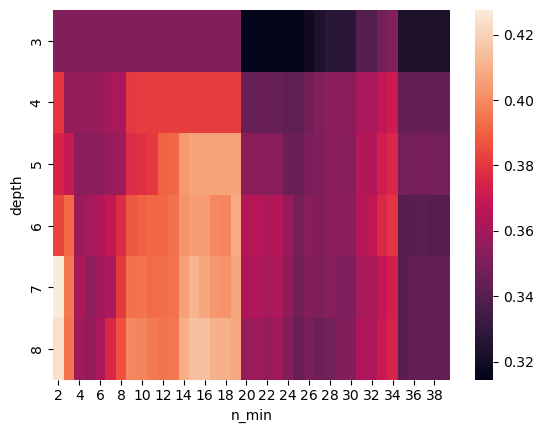

In [16]:
# Here we will use loop to see how deep and how many leaves would be optimal for our decision tree.

mses = []
ind_i = [] # Depth
ind_j = [] # Leaves

for i in range(3, 9):
    for j in range(2, 40):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'depth':ind_i, 'n_min':ind_j})
sns.heatmap(df_mse.pivot(index='depth', columns='n_min', values='mses'))
df_mse.pivot(index='depth', columns='n_min', values='mses')

In [17]:
#this is the regression tree, max depth, and minimum sample per leaf where calculated above. CCP alpha was calculated below and inserted to avoid overfitting.
reg = DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, ccp_alpha=26908.966252647573  )

reg.fit(X_train, y_train)

R_sqr1 = reg.score(X_test, y_test)
R_sqr1

0.4274069035955548

In [18]:
#CCP is the cost of complexity, it avoids overfitting by cutting the weakest links in the tree at the cost of increasing impurities.
path = reg.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.19508904e+03, 1.33072519e+03, 2.30589444e+03,
        4.31298646e+03, 4.93807795e+03, 6.20360931e+03, 6.80459875e+03,
        7.47274757e+03, 8.30262720e+03, 1.04438525e+04, 1.26820566e+04,
        1.36362776e+04, 1.44867594e+04, 1.50607477e+04, 1.59163762e+04,
        1.62992083e+04, 1.63858666e+04, 1.74448760e+04, 1.79713894e+04,
        1.89084618e+04, 2.14691893e+04, 2.34656122e+04, 2.41096558e+04,
        2.56178380e+04, 2.57390718e+04, 2.69089663e+04, 3.21088682e+04,
        3.25693317e+04, 3.44572019e+04, 4.16534575e+04, 4.26141358e+04,
        4.34396020e+04, 4.36220156e+04, 4.42911885e+04, 4.49792589e+04,
        4.84626465e+04, 4.89343031e+04, 5.00863015e+04, 6.17672571e+04,
        6.34042805e+04, 6.73788602e+04, 7.03794374e+04, 8.58693519e+04,
        9.10376396e+04, 9.48591479e+04, 1.07396214e+05, 1.10368275e+05,
        1.12803716e+05, 1.17951259e+05, 1.29416942e+05, 1.39029349e+05,
        1.39749186e+05, 1.49059463e+05, 1.54739005

In [19]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

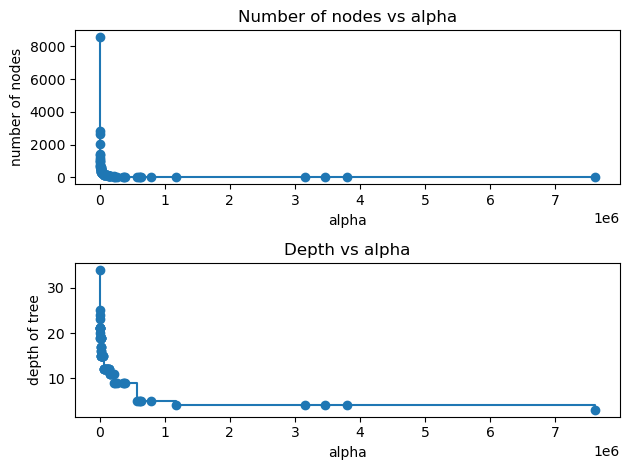

In [20]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [21]:
#save MSE values for each regression that is created to see which one is the best. We can print this if needed
mse_values = []

for clf in clfs:
  mse = mean_squared_error(y_test, clf.predict(X_test))

  # save MSE values
  mse_values.append(mse)

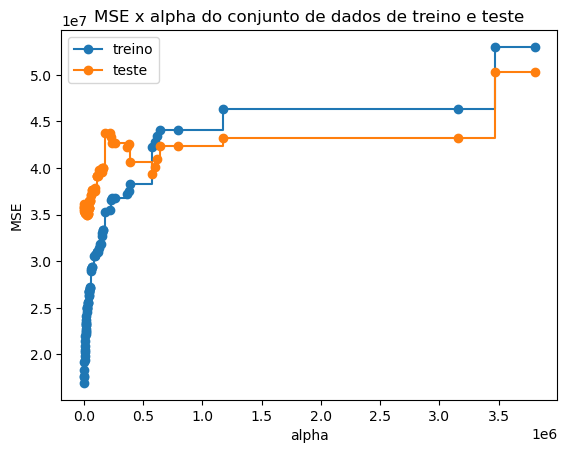

In [22]:
# In this block we will train and test several trees with the difrent alphas the we previoulsy calculated.
# We need to find the ccp_alpha with the lower MSE.

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [23]:
# finding the best MSE and Alpha doing a df
alpha_mse = pd.DataFrame ({'alpha': ccp_alphas.tolist(), 'MSE': test_scores})

In [24]:
menor_mse = np.inf
melhor_ccp = 0

for i, mse in enumerate(alpha_mse['MSE']):
  if mse <= menor_mse:  
    menor_mse = mse
    melhor_ccp = alpha_mse['alpha'][i]

print(f'The CCP_ALPHA for the lower MSE is {melhor_ccp} with the MSE {menor_mse}.')


The CCP_ALPHA for the lower MSE is 26908.96625265293 with the MSE 34979545.73743462.


In [25]:
# using the pacage "from sklearn.metrics import mean_squared_error" we can get the MSE
mse_1 = mean_squared_error(y_test, reg.predict(X_test))
print("True MSE:", mse_1)

True MSE: 35794383.90857871


In [26]:
# to better vissualize what this MSE means and if it is good we can use RMSE which is easier to see with the data.
RMSE = np.sqrt(mse_1)
RMSE

5982.840789171872

## Step 5 Crisp-DM: Evaluation


<span style="color:red">The model was generated avoiding overfitting and with the best parameters of depth and leaf size, the R² of the test and training as well as the RMSE looks fine to be used.</span>


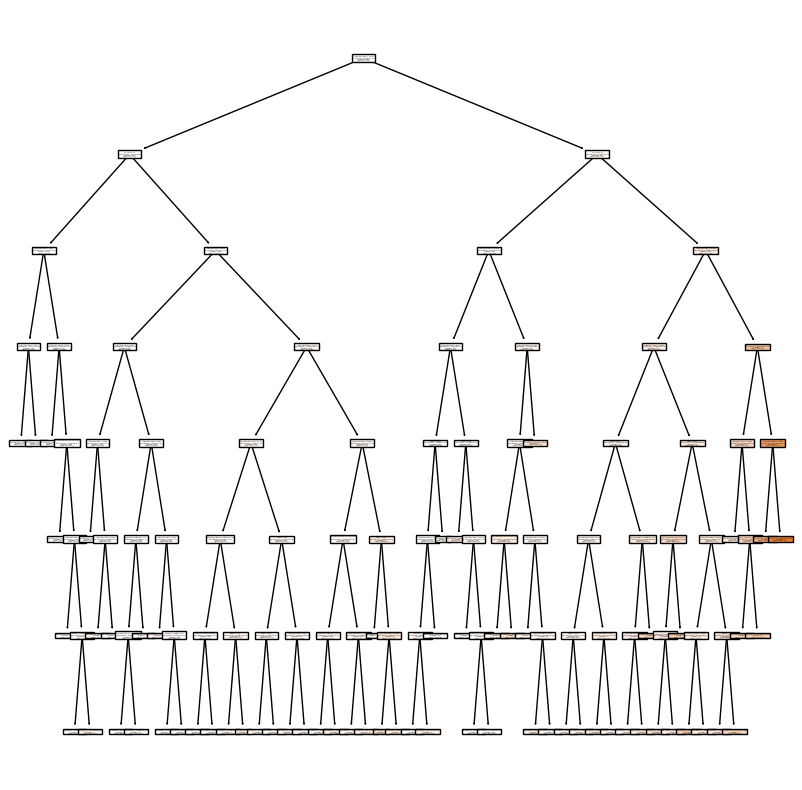

In [27]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg, 
                    feature_names=X_tree.columns,  
                    filled=True) 

In [28]:
print(f'R-sqr of the train is: {reg.score(X_train, y_train)*100:.2f}%')

R-sqr of the train is: 58.87%


In [29]:
print(f'R-sqr of the test is: {reg.score(X_test, y_test)*100:.2f}%')

R-sqr of the test is: 42.74%


## Step 6 Crisp-DM: Deployment
At this stage we put the developed model into use, normally implementing the developed model in an engine that makes decisions with some level of automation.